Exploratory Data Analysis (EDA) Notebook<br>
The EDA notebook provides a thorough exploratory analysis of the attrition dataset. It includes summary
statistics, feature distributions, and visualizations to uncover patterns related to employee churn. Below are
representative analyses and their findings:<br>
Data Summary and Missing Values: <br>First, we load the data and check its shape and completeness. The
dataset has 1,470 rows and 35 columns. A quick check shows  no missing values in any column, so no
imputation is needed. We also drop uninformative constants (e.g.  EmployeeCount ,  EmployeeNumber , 
StandardHours ,  Over18  are constant for all rows) to simplify analysis

In [66]:
import pandas as pd
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("Dataset shape:", data.shape)
print("\nMissing values per column:\n", data.isnull().sum())

Dataset shape: (1470, 35)

Missing values per column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany 

Target Distribution (Attrition): We examine how many employees have left the company

In [67]:
attr_counts = data['Attrition'].value_counts()
print(attr_counts)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


Summary Statistics (Numeric Features): We compute descriptive statistics for numerical columns (mean,
std, min, max, quartiles):

In [68]:
numeric_summary = data.describe()
print(numeric_summary.loc[['mean','std','min','50%','max']])

            Age    DailyRate  DistanceFromHome  Education  EmployeeCount  \
mean  36.923810   802.485714          9.192517   2.912925            1.0   
std    9.135373   403.509100          8.106864   1.024165            0.0   
min   18.000000   102.000000          1.000000   1.000000            1.0   
50%   36.000000   802.000000          7.000000   3.000000            1.0   
max   60.000000  1499.000000         29.000000   5.000000            1.0   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
mean     1024.865306                 2.721769   65.891156        2.729932   
std       602.024335                 1.093082   20.329428        0.711561   
min         1.000000                 1.000000   30.000000        1.000000   
50%      1020.500000                 3.000000   66.000000        3.000000   
max      2068.000000                 4.000000  100.000000        4.000000   

      JobLevel  ...  RelationshipSatisfaction  StandardHours  \
mean  2.063946  

Numeric Feature Distributions: We plot histograms (or describe them) for key numerical features to see
their distributions:

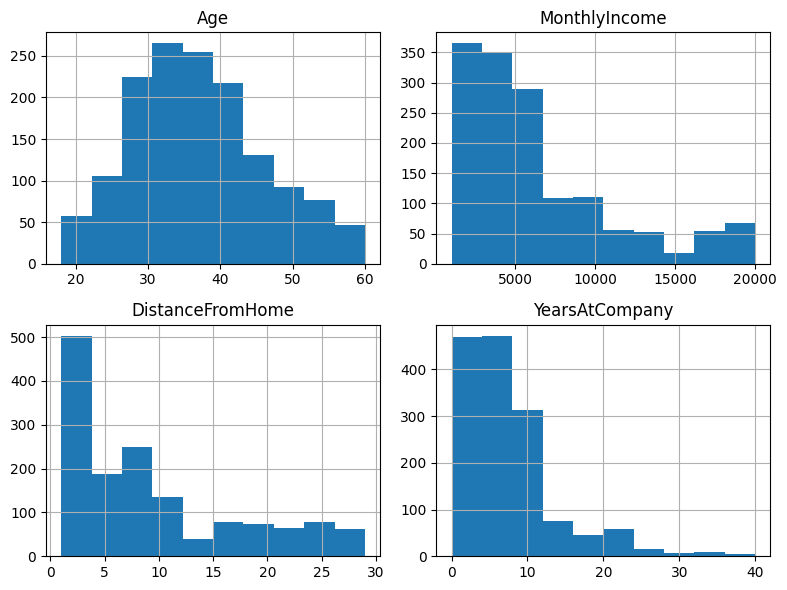

In [69]:
import matplotlib.pyplot as plt
numeric_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany']
data[numeric_cols].hist(bins=10, figsize=(8,6))
plt.tight_layout()
plt.show()

Categorical Feature Counts:  Next, we examine how many employees fall into each category for key
categorical features:

In [70]:
categorical_cols =['Department','BusinessTravel','Gender','MaritalStatus','OverTime']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())


Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Value counts for MaritalStatus:
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Value counts for OverTime:
OverTime
No     1054
Yes     416
Name: count, dtype: int64


Attrition by Category – Department: We compare attrition rates across departments

In [71]:
dept_attr = data.groupby(['Department','Attrition']).size().unstack()
print(dept_attr)

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


Attrition by Gender: Check if attrition differs by gender

In [72]:
gender_attr = data.groupby(['Gender','Attrition']).size().unstack()
print(gender_attr)

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


Attrition by Marital Status:

In [73]:
ms_attr = data.groupby(['MaritalStatus','Attrition']).size().unstack()
print(ms_attr)

Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


Attrition vs OverTime:

In [74]:
ot_attr = data.groupby(['OverTime','Attrition']).size().unstack()
print(ot_attr)

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


WorkLifeBalance vs Attrition:


In [75]:
wlb_attr = data.groupby(['WorkLifeBalance','Attrition']).size().unstack()
print(wlb_attr)


Attrition         No  Yes
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27


Correlations (Numeric Features):  We compute the correlation matrix and examine correlations with
attrition

In [76]:
import numpy as np
df_num = data.select_dtypes(include='int64').copy()
df_num['Attrition_Flag'] = data['Attrition'].map({'No':0,'Yes':1})
corr_matrix = df_num.corr()
corr_with_attr = corr_matrix['Attrition_Flag'].sort_values(ascending=False)
print(corr_with_attr.head(5))
print(corr_with_attr.tail(5))

Attrition_Flag        1.000000
DistanceFromHome      0.077924
NumCompaniesWorked    0.043494
MonthlyRate           0.015170
PerformanceRating     0.002889
Name: Attrition_Flag, dtype: float64
YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
EmployeeCount              NaN
StandardHours              NaN
Name: Attrition_Flag, dtype: float64


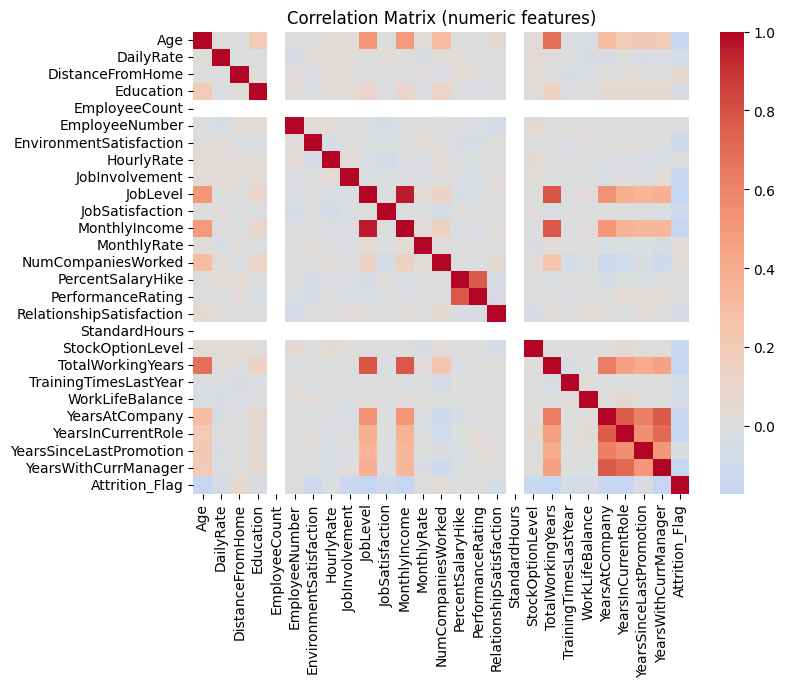

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (numeric features)")
plt.show()

Pairwise Relationships:  We   can   also   visualize   pairwise   scatterplots   for   select   features   colored   by
Attrition . For example, a pairplot of  Age ,  MonthlyIncome ,  YearsAtCompany

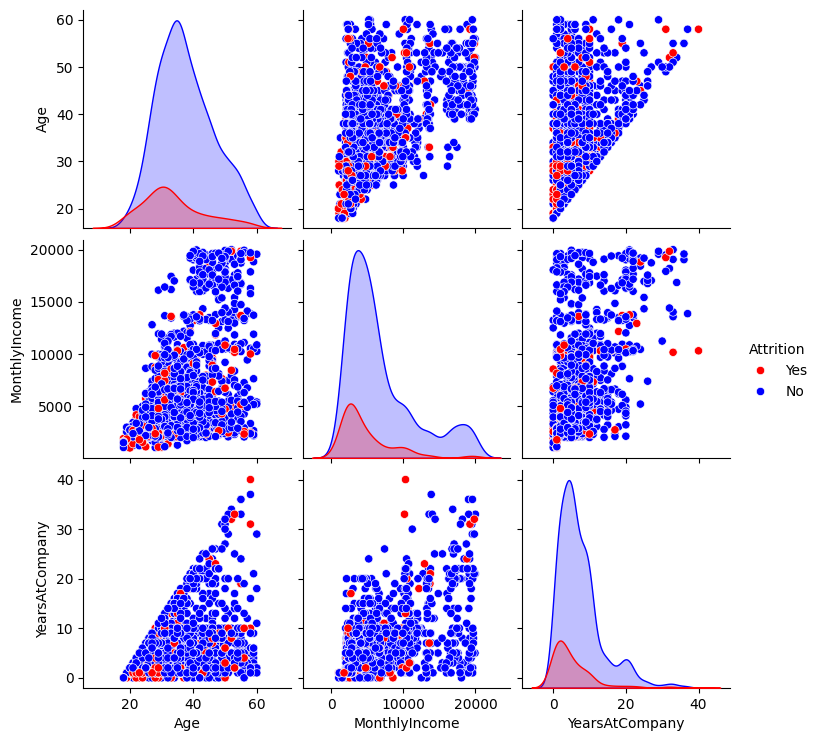

In [78]:
sns.pairplot(data[['Age','MonthlyIncome','YearsAtCompany','Attrition']],
hue='Attrition', palette={'Yes':'r','No':'b'}, diag_kind='kde')
plt.show()

Box Plot – Monthly Income by Attrition: We create a boxplot of MonthlyIncome grouped by Attrition

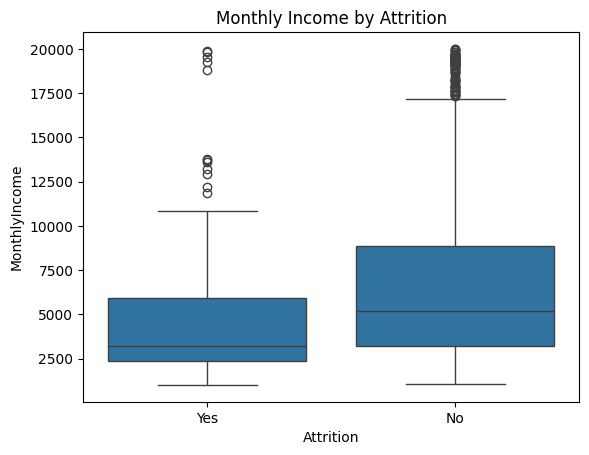

In [79]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title("Monthly Income by Attrition")
plt.show()

Box Plot – YearsAtCompany by Attrition:

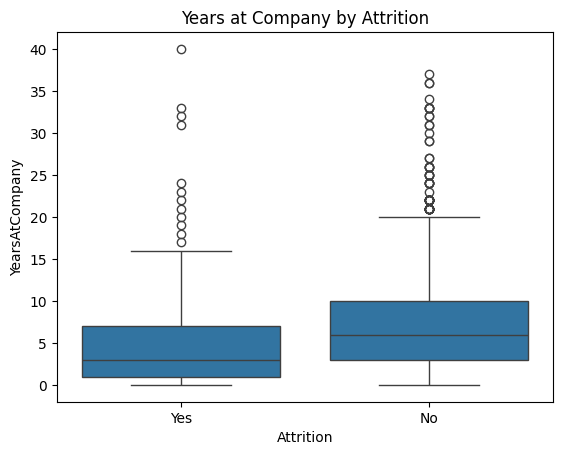

In [80]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.title("Years at Company by Attrition")
plt.show()

Grouped Aggregations: As another perspective, we compute aggregate statistics

In [81]:
grouped = data.groupby('Attrition').agg({'MonthlyIncome':'mean','TotalWorkingYears':'mean'})
print(grouped)

           MonthlyIncome  TotalWorkingYears
Attrition                                  
No           6832.739659          11.862936
Yes          4787.092827           8.244726


Preprocessing Steps:  <br>
We perform the following data preparation: <br>
-  Feature selection:  <br>
Drop unneeded columns:  EmployeeNumber  (ID),  StandardHours ,  EmployeeCount ,  Over18  (all constant). <br>
- Encode categorical variables:  Convert binary columns ( Attrition ,   Gender ,   OverTime ) to 0/1. One-hot
encode   multi-class   categoricals   ( Department ,   JobRole ,   MaritalStatus ,   etc.).   <br>
-  Scale numeric features:  For   tree-based   models   this   is   optional,   but   we   standardize   numeric   features   (e.g.,   Age , 
MonthlyIncome , etc.) to have zero mean and unit variance. <br>
-  Train-test split:  Split data into training (80%) and test (20%) sets.

In [82]:
from sklearn.model_selection import train_test_split
from data_preprocessing import preprocess_data
# Preprocess and split
X_train, X_test, y_train, y_test = preprocess_data(data)
print("Training set size:", X_train.shape[0], "Test set size:", X_test.shape[0])

Training set size: 1176 Test set size: 294


Random Forest Training:<br> We train a Random Forest classifier to predict attrition

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation:<br> We use the test set to evaluate model performance. We compute accuracy, precision, recall, F1-
score, and display the confusion matrix

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
6
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.827
Precision: 0.300
Recall: 0.064
F1-score: 0.105
Confusion Matrix:
 [[240   7]
 [ 44   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294



Real-time Prediction Function:<br> 
We enable user-input predictions by defining a function that takes new
employee data and outputs the attrition prediction:

In [85]:
import numpy as np
def predict_attrition(model, input_df):
    """
        Given a trained model and a single-row DataFrame of input features (after 
    preprocessing),
        return the predicted probability and class (Yes/No) for attrition.
        """
    prob = model.predict_proba(input_df)[:,1][0] # probability of attrition=1
    pred_class = model.predict(input_df)[0]
    return prob, pred_class
    # Example usage:
    new_employee = X_test.iloc[[0]] # (for demonstration, use first test example)
    prob, pred = predict_attrition(rf, new_employee)
    print("Attrition probability:", prob, " Predicted class:", pred)

Model Explanation: <br> We use Random Forest because it handles mixed data types well and can capture
nonlinear   relationships.   It   also   provides   feature   importances.   (We   could   examine
rf.feature_importances_  to see which features matter most.) Based on EDA, we expect features like
OverTime ,  MonthlyIncome ,  TotalWorkingYears , and satisfaction scores to be important.

Reusable Python Modules<br>
To make the code modular and reusable, we create separate Python modules:
data_preprocessing.py:  Contains functions to clean and preprocess the data (handling missing
values, encoding categories, scaling, splitting). This allows reusing preprocessing logic in both the
modeling notebook and the Streamlit app. Example functions include

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def preprocess_data(df):
# Drop constant/uninformative columns
    df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1)
    # Encode binary features
    df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
    df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
    df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})
    # One-hot encode remaining categoricals
    df = pd.get_dummies(df, drop_first=True)
    # Separate target and features
    y = df['Attrition'].values
    X = df.drop('Attrition', axis=1)
    # Scale numeric features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test